In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

import warnings as wrn
wrn.filterwarnings("ignore")


In [2]:
dataset = pd.read_csv(r'C:\Users\Gundeep Gulati\Desktop\Language_Identification_dataset\dataset.csv')

In [3]:
dataset.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
# Splitting X and Y
x = dataset["Text"]
y = dataset["language"]

# Encoding Y 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y[:10])

[ 4 17 19 18  2  8 20 10 21  8]


In [5]:
#print unique languages
print(len(np.unique(y)))

22


In [6]:
# Cleaning and lowering text
def cleanLower(texts):
    
    # This regular expression pattern means everything except alphabetical characters
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

x = cleanLower(x)
x[:4]

[' lement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
 ' ebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களு

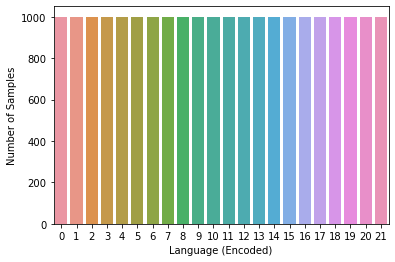

In [7]:
plt.subplots(figsize=(6,4))
sns.countplot(y)
plt.xlabel("Language (Encoded)")
plt.ylabel("Number of Samples")
plt.show()

In [8]:
vectorizer = CountVectorizer(max_features=10000)
x_end = vectorizer.fit_transform(x)

In [9]:
x_end.shape

(22000, 10000)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_end.toarray(),y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17600, 10000)
(4400, 10000)
(17600,)
(4400,)


In [11]:
start_time = time.time()


model = BernoulliNB()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))

Fitting Naive Bayes model took 28.43 seconds


In [11]:
start_time = time.time()


model = LogisticRegression(solver='saga',multi_class="ovr")
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))




Fitting Naive Bayes model took 3381.65 seconds


In [12]:
def evalModel(cls,test_set):
    x,y = test_set
    y_pred = cls.predict(x)
    conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y)
    acc = round(accuracy_score(y_pred=y_pred,y_true=y),2) * 100
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
    print("FP",FP)
    
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    print("FN",FN)
    TP = np.diag(conf_matrix)
    print("TP",TP)
    TN = conf_matrix.sum() - (FP + FN + TP)
    print("TN",TN)
    
    TPR = TP/(TP+FN)
    print("TPR",TPR)
    
    TNR = TN/(TN+FP) 
    print("TNR",TNR)
    
    print(f"Accuracy is {acc}%")
    plt.subplots(figsize=(20,20))
    sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.xlabel("Predicted Label",fontsize=20)
    plt.ylabel("True Label",fontsize=20)
    plt.show()

FP [  0  54   0  28   0   6   0   0 230   0   0   0   0   0   0   1   0   0
   0   0   0   0]
FN [  7 136   8   5  15   5   4   7  12  14  25   5  13   8   5  16   6   0
   1   8   6  13]
TP [195  65 222 189 185 183 204 206 182 176 185 191 181 188 192 197 193 179
 197 188 193 190]
TN [4198 4145 4170 4178 4200 4206 4192 4187 3976 4210 4190 4204 4206 4204
 4203 4186 4201 4221 4202 4204 4201 4197]
TPR [0.96534653 0.32338308 0.96521739 0.9742268  0.925      0.97340426
 0.98076923 0.96713615 0.93814433 0.92631579 0.88095238 0.9744898
 0.93298969 0.95918367 0.97461929 0.92488263 0.96984925 1.
 0.99494949 0.95918367 0.96984925 0.93596059]
TNR [1.         0.9871398  1.         0.99334284 1.         0.9985755
 1.         1.         0.94531621 1.         1.         1.
 1.         1.         1.         0.99976117 1.         1.
 1.         1.         1.         1.        ]
Accuracy is 93.0%


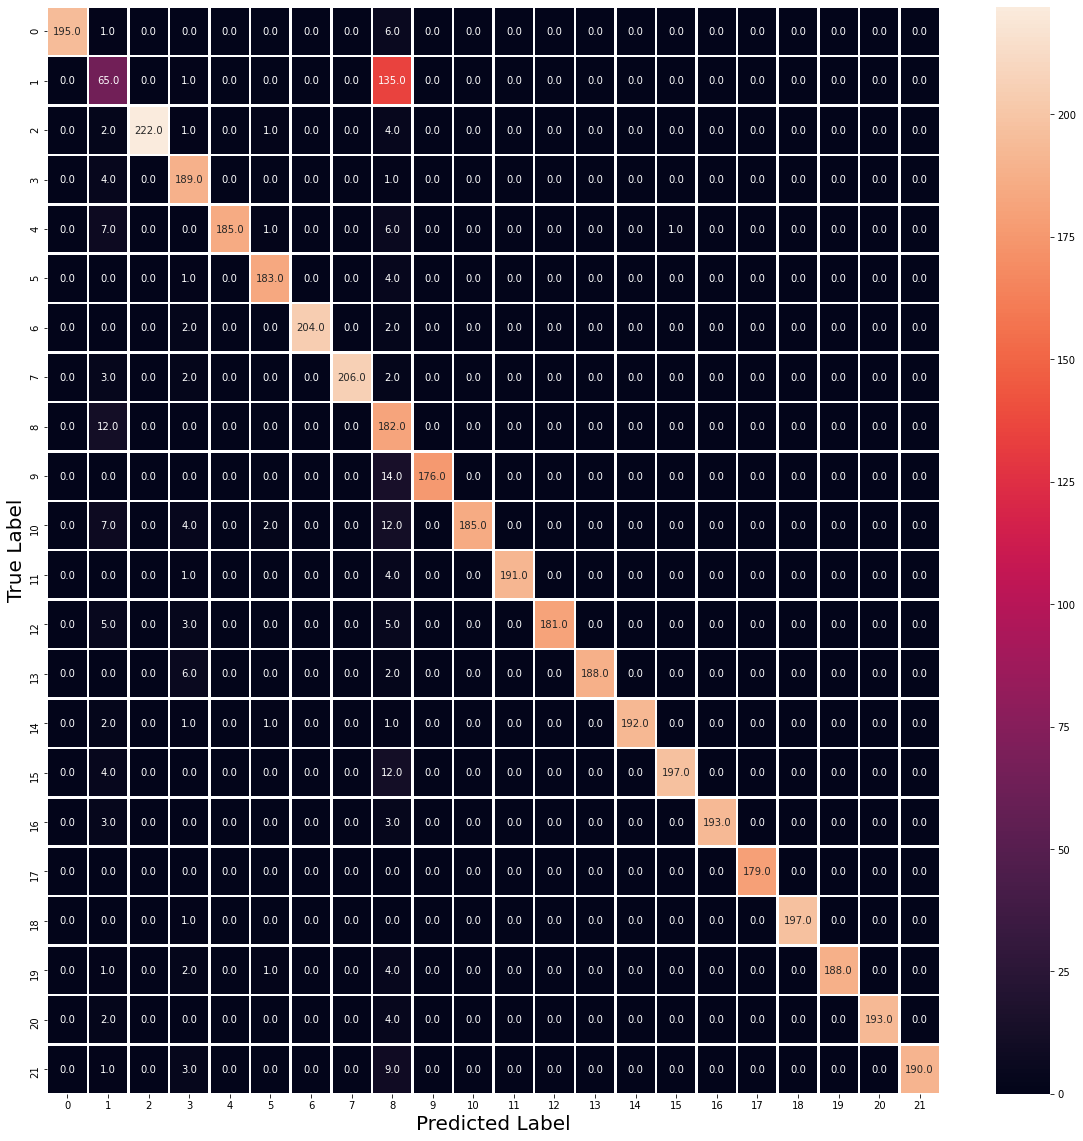

In [13]:
evalModel(model,(x_test,y_test))

In [14]:
encoder.inverse_transform([1,5])

array(['Chinese', 'French'], dtype=object)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
print('F1 Score: ',f1_score(y_test,model.predict(x_test), average='macro'))
print('Precision Score: ',precision_score(y_test,model.predict(x_test), average='macro'))
print('Recall Score: ',f1_score(y_test,model.predict(x_test), average='macro'))
print('MCC score: ',matthews_corrcoef(y_test,model.predict(x_test), sample_weight=None))

F1 Score:  0.9311590132597051
Precision Score:  0.946460784788611
Recall Score:  0.9311590132597051
MCC score:  0.9254704061209236


In [16]:
from sklearn.metrics import roc_curve, auc


In [18]:
print(classification_report(model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       195
           1       0.32      0.55      0.41       119
           2       0.97      1.00      0.98       222
           3       0.97      0.87      0.92       217
           4       0.93      1.00      0.96       185
           5       0.97      0.97      0.97       189
           6       0.98      1.00      0.99       204
           7       0.97      1.00      0.98       206
           8       0.94      0.44      0.60       412
           9       0.93      1.00      0.96       176
          10       0.88      1.00      0.94       185
          11       0.97      1.00      0.99       191
          12       0.93      1.00      0.97       181
          13       0.96      1.00      0.98       188
          14       0.97      1.00      0.99       192
          15       0.92      0.99      0.96       198
          16       0.97      1.00      0.98       193
          17       1.00    